In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Datos
textos = [
    "Gana dinero fácil ahora", # [gana , dinero , facil , ahora ] => [1 , 1 ,1, 0]
    "Oferta exclusiva para ti",
    "Llama ya y gana un premio",
    "Tu factura está lista",
    "Reunión confirmada a las 3 pm",
    "Actualización de tu cuenta"
]
etiquetas = ["spam", "spam", "spam", "no spam", "no spam", "no spam"]

#Naive Bayes ('naive : ingenuo') clasificación basado en el teorema de bayes , 'clasificación de texto'

#Convertir textos a vectores de caracteristicas 
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(textos)

#Dvidir los datos en entrenamiento y prueba 
X_train , X_test , y_train , y_test = train_test_split(X, etiquetas , test_size = 0.2 , random_state=42)

#Entrenar el modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_train ,y_train)

#predecir 
predicciones = modelo.predict(X_test)

#datos de prueba 
nuevos_textos = ['Has click aqui para ganar un premio',
                'Tu cita medica esta confirmada ']
#Convertir estos textos de prueba a vectores
X_nuevos = vectorizador.transform(nuevos_textos)

#hacer las predicciones
predicciones_nuevas = modelo.predict(X_nuevos)
print(predicciones_nuevas)

#metricas
y_pred = modelo.predict(X_test)
# precision :
precision =  accuracy_score(y_test , y_pred)
print('Precision : ',precision)

# clasificacion detallada 
reporte = classification_report(y_test , y_pred)
print ('Reporte de clasificacion : ' , reporte)

#Matriz de confusión 
matriz_confusion = confusion_matrix(y_test , y_pred)
print('la matriz de confusión es : \n' ,matriz_confusion )


['spam' 'no spam']
Precision :  0.5
Reporte de clasificacion :                precision    recall  f1-score   support

     no spam       0.00      0.00      0.00         0
        spam       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

la matriz de confusión es : 
 [[0 0]
 [1 1]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Datos: [nota1, nota2, promedio]
datos = np.array([
    [85, 90, 88],  # Aprobado
    [70, 65, 68],  # Reprobado
    [95, 92, 94],  # Aprobado
    [60, 58, 59],  # Reprobado
    [80, 85, 83],  # Aprobado
    [55, 50, 52]   # Reprobado
])
etiquetas = ["aprobado", "reprobado", "aprobado", "reprobado", "aprobado", "reprobado"]

#Dividir los datos 
X_train , X_test , y_train , y_test = train_test_split(datos ,etiquetas , test_size = 0.2 , random_state = 42)

#Entrenar el modelo 
modelo = GaussianNB()
modelo.fit(X_train , y_train)

#probar el modelo 
nuevos_datos=np.array([[90,92,91],
                      [50,45,40]])

predicciones =modelo.predict(nuevos_datos)
print(predicciones)


#metricas
y_pred = modelo.predict(X_test)
# precision :
precision =  accuracy_score(y_test , y_pred)
print('Precision : ',precision)

# clasificacion detallada 
reporte = classification_report(y_test , y_pred)
print ('Reporte de clasificacion : ' , reporte)

#Matriz de confusión 
matriz_confusion = confusion_matrix(y_test , y_pred)
print('la matriz de confusión es : \n' ,matriz_confusion )

['aprobado' 'reprobado']
Precision :  1.0
Reporte de clasificacion :                precision    recall  f1-score   support

    aprobado       1.00      1.00      1.00         1
   reprobado       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

la matriz de confusión es : 
 [[1 0]
 [0 1]]


[1]


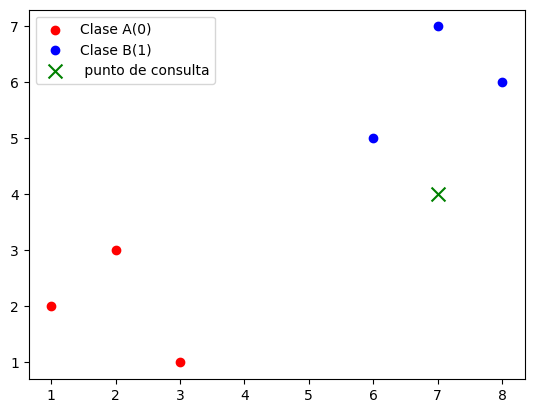

In [21]:
# Paso 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Paso 2: Crear datos de ejemplo
# Clase A (rojo)
X_A = np.array([[1, 2], [2, 3], [3, 1]])
y_A = np.array([0, 0, 0])  # Etiqueta 0 para clase A

# Clase B (azul)
X_B = np.array([[6, 5], [7, 7], [8, 6]])
y_B = np.array([1, 1, 1])  # Etiqueta 1 para clase B

#KNN ( K-VECINOS MAS CERCANOS) ES UN ALGORITMO DE aprendizaje supervisado que se 
#utiliza para clasificacion y regresion
# Se basa en encontrar los K puntos de Datos mas cercanos 
#Funcion distancia (euclidea , manhattan)


# Agrupar O combinar los datos
X = np.vstack((X_A , X_B))
y = np.hstack((y_A , y_B))

#Crear el modelo KNN
k = 3 # usaremos 3 vecinos 
modelo = KNeighborsClassifier(n_neighbors = k)

#entrenar el modelo 
modelo.fit(X,y)

#hacemos una predicción
punto = np.array([[7,4]]) #([0 , 0] , [ 0,1]) =>(x ,y)

# prediccion
clase = modelo.predict(punto)
print(clase)

# Visualizar los datos 
plt.scatter(X_A[: , 0] , X_A[: , 1] , color='red' , label= 'Clase A(0)')
plt.scatter(X_B[: , 0] , X_B[: , 1] , color='blue' , label ='Clase B(1)')
plt.scatter(punto[0,0] , punto[0,1] , color = 'green', marker='x' ,label = ' punto de consulta' , s=100)
plt.legend()
plt.show()

Matriz de confusión :  [[2]]
Reporte de clasificacion               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

La precisión del modelo :  1.0
[1]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


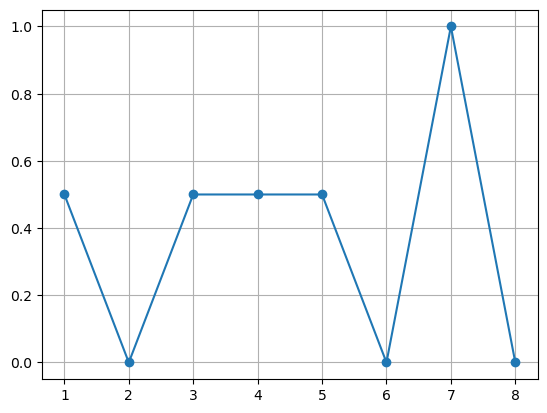

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Paso 2: Cargar el dataset Titanic (datos fijos)
data = {
    "Pclass": [3, 1, 3, 1, 3, 3, 1, 3, 3, 2],
    "Sex": ["male", "female", "female", "female", "male", "male", "male", "female", "female", "male"],
    "Age": [22, 38, 26, 35, 35, None, 54, 2, 27, 14],
    "Fare": [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708],
    "Survived": [0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
}
df = pd.DataFrame(data)

#preprocesar los datos 
#Reemplazaremos los valores nulos o datos faltantes con la media de la edad
df["Age"] = df["Age"].fillna(df["Age"].mean())

#Convertir la columna 'Sex' a numerica (0 : male , 1 : female)
#programacion funcional con python
df["Sex"] = df["Sex"].map({"male":0 , "female":1})

#Seleccionar caracteristicas (X) , etiquetas (Y)
X = df[["Pclass" ,"Sex" , "Age" ,"Fare"]]
y = df['Survived']

#Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 42)

# Crear el modelo 
k = 7 # numero de vecinos 
modelo =  KNeighborsClassifier(n_neighbors = k)

#entrenar el modelo 
modelo.fit(X_train , y_train)

# modelo predictivo 
y_pred = modelo.predict(X_test)

#metricas
print('Matriz de confusión : ' , confusion_matrix(y_test , y_pred))
print('Reporte de clasificacion' , classification_report(y_test , y_pred))
print('La precisión del modelo : ' , accuracy_score(y_test , y_pred))


# nuevo pasajero 
nuevo_pasajero = np.array([[2 ,1 ,29, 20.5]])
prediccion = modelo.predict(nuevo_pasajero)
print(prediccion)


# Evaluacion grafica de la precisión varian el k

#Limitar el ran de k al tamaño del conjunto
max_k = len(X_train) # Maximo numero de vecinos
k_values = range(1 , max_k +1)

#Probar diferentes valores de k y calcular la precision
precision = []
for k in k_values:
    modelo =  KNeighborsClassifier(n_neighbors = k)
    modelo.fit(X_train , y_train)
    y_pred = modelo.predict(X_test)
    precision.append(accuracy_score(y_test , y_pred))
    
#Grafica del k 
plt.plot(k_values , precision , marker='o')
plt.title('Precision vs k')
plt.xlabel('k')
plt.ylabel('k')
plt.grid()
plt.show()
